### Edgar Moises Hernandez-Gonzalez
#### 17/05/20-18/05/20
#### Clasificacion de imagenes motoras en EEG con CNN-2D
##### Caracteristicas = RWE-DWT
##### Validacion cruzada

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score, confusion_matrix
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A09T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/MI-EEG-RWE-A09E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA09T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RWE_DWT/EtiquetasA09E.csv", header=None)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 66)
(288, 66)
(288, 1)
(288, 1)


In [0]:
x = pd.concat([x_train, x_test])
y = pd.concat([y_train, y_test])

In [7]:
print(x.shape)
print(y.shape)

(576, 66)
(576, 1)


In [8]:
# en caso de no tener el y_test se puede utilizar el x_test
n_samples = len(y)

print("n_samples:", n_samples)

n_samples: 576


In [9]:
# esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test
n_classes = len(np.unique(y))

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
x = StandardScaler().fit_transform(x)

In [11]:
# codificar etiquetas con valores de 0 a nClases-1
y = LabelEncoder().fit_transform(y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
#convertir de 2D a 4D
x = x.reshape((n_samples, 22, 3, 1))

print(x.shape)

(576, 22, 3, 1)


In [0]:
mc = ModelCheckpoint('/content/drive/My Drive/BCI-IV-2a/Modelos/Modelo_RWE09_CV.hdf5',
                     monitor='val_accuracy', save_best_only=True, verbose=1)

In [0]:
skf = StratifiedKFold(n_splits = 10)

In [0]:
def CNN_2D():
  model = Sequential()
  model.add(Conv2D(32, (3,3), activation='relu', padding='same',
                   input_shape=x_train.shape[1:]))
  model.add(Flatten())
  model.add(Dense(16, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(n_classes, activation='softmax'))

  optimizer = Adam(lr=1e-4)
  model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
  return model


Iteration: 1

Epoch 00001: val_accuracy improved from -inf to 0.36207, saving model to /content/drive/My Drive/BCI-IV-2a/Modelos/Modelo_RWE09_CV.hdf5

Epoch 00002: val_accuracy did not improve from 0.36207

Epoch 00003: val_accuracy did not improve from 0.36207

Epoch 00004: val_accuracy did not improve from 0.36207

Epoch 00005: val_accuracy did not improve from 0.36207

Epoch 00006: val_accuracy improved from 0.36207 to 0.37931, saving model to /content/drive/My Drive/BCI-IV-2a/Modelos/Modelo_RWE09_CV.hdf5

Epoch 00007: val_accuracy did not improve from 0.37931

Epoch 00008: val_accuracy did not improve from 0.37931

Epoch 00009: val_accuracy did not improve from 0.37931

Epoch 00010: val_accuracy did not improve from 0.37931

Epoch 00011: val_accuracy did not improve from 0.37931

Epoch 00012: val_accuracy did not improve from 0.37931

Epoch 00013: val_accuracy did not improve from 0.37931

Epoch 00014: val_accuracy did not improve from 0.37931

Epoch 00015: val_accuracy did not im

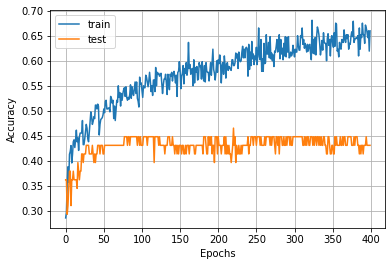

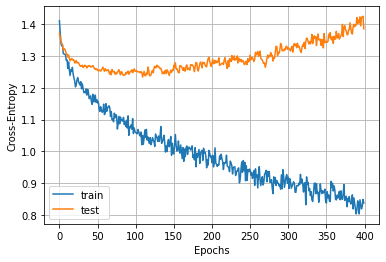


Iteration: 2

Epoch 00001: val_accuracy did not improve from 0.46552

Epoch 00002: val_accuracy did not improve from 0.46552

Epoch 00003: val_accuracy did not improve from 0.46552

Epoch 00004: val_accuracy did not improve from 0.46552

Epoch 00005: val_accuracy did not improve from 0.46552

Epoch 00006: val_accuracy did not improve from 0.46552

Epoch 00007: val_accuracy did not improve from 0.46552

Epoch 00008: val_accuracy did not improve from 0.46552

Epoch 00009: val_accuracy did not improve from 0.46552

Epoch 00010: val_accuracy did not improve from 0.46552

Epoch 00011: val_accuracy did not improve from 0.46552

Epoch 00012: val_accuracy did not improve from 0.46552

Epoch 00013: val_accuracy did not improve from 0.46552

Epoch 00014: val_accuracy did not improve from 0.46552

Epoch 00015: val_accuracy did not improve from 0.46552

Epoch 00016: val_accuracy did not improve from 0.46552

Epoch 00017: val_accuracy did not improve from 0.46552

Epoch 00018: val_accuracy did not

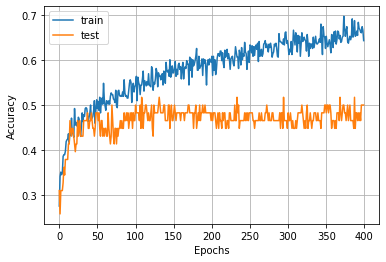

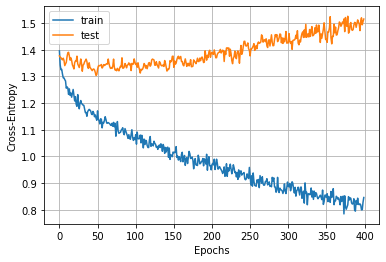


Iteration: 3

Epoch 00001: val_accuracy did not improve from 0.51724

Epoch 00002: val_accuracy did not improve from 0.51724

Epoch 00003: val_accuracy did not improve from 0.51724

Epoch 00004: val_accuracy did not improve from 0.51724

Epoch 00005: val_accuracy did not improve from 0.51724

Epoch 00006: val_accuracy did not improve from 0.51724

Epoch 00007: val_accuracy did not improve from 0.51724

Epoch 00008: val_accuracy did not improve from 0.51724

Epoch 00009: val_accuracy did not improve from 0.51724

Epoch 00010: val_accuracy did not improve from 0.51724

Epoch 00011: val_accuracy did not improve from 0.51724

Epoch 00012: val_accuracy did not improve from 0.51724

Epoch 00013: val_accuracy did not improve from 0.51724

Epoch 00014: val_accuracy did not improve from 0.51724

Epoch 00015: val_accuracy did not improve from 0.51724

Epoch 00016: val_accuracy did not improve from 0.51724

Epoch 00017: val_accuracy improved from 0.51724 to 0.55172, saving model to /content/driv

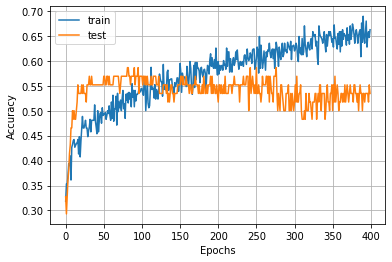

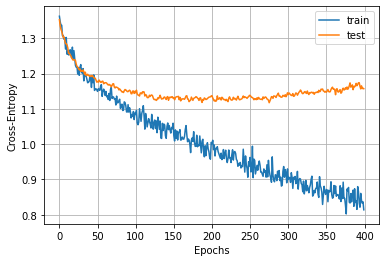


Iteration: 4

Epoch 00001: val_accuracy did not improve from 0.58621

Epoch 00002: val_accuracy did not improve from 0.58621

Epoch 00003: val_accuracy did not improve from 0.58621

Epoch 00004: val_accuracy did not improve from 0.58621

Epoch 00005: val_accuracy did not improve from 0.58621

Epoch 00006: val_accuracy did not improve from 0.58621

Epoch 00007: val_accuracy did not improve from 0.58621

Epoch 00008: val_accuracy did not improve from 0.58621

Epoch 00009: val_accuracy did not improve from 0.58621

Epoch 00010: val_accuracy did not improve from 0.58621

Epoch 00011: val_accuracy did not improve from 0.58621

Epoch 00012: val_accuracy did not improve from 0.58621

Epoch 00013: val_accuracy did not improve from 0.58621

Epoch 00014: val_accuracy did not improve from 0.58621

Epoch 00015: val_accuracy did not improve from 0.58621

Epoch 00016: val_accuracy did not improve from 0.58621

Epoch 00017: val_accuracy did not improve from 0.58621

Epoch 00018: val_accuracy did not

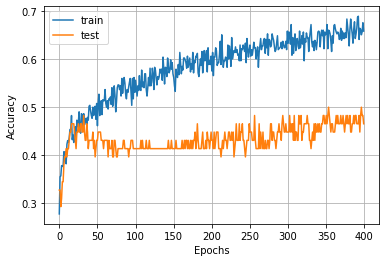

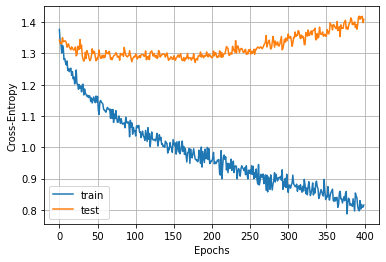


Iteration: 5

Epoch 00001: val_accuracy did not improve from 0.58621

Epoch 00002: val_accuracy did not improve from 0.58621

Epoch 00003: val_accuracy did not improve from 0.58621

Epoch 00004: val_accuracy did not improve from 0.58621

Epoch 00005: val_accuracy did not improve from 0.58621

Epoch 00006: val_accuracy did not improve from 0.58621

Epoch 00007: val_accuracy did not improve from 0.58621

Epoch 00008: val_accuracy did not improve from 0.58621

Epoch 00009: val_accuracy did not improve from 0.58621

Epoch 00010: val_accuracy did not improve from 0.58621

Epoch 00011: val_accuracy did not improve from 0.58621

Epoch 00012: val_accuracy did not improve from 0.58621

Epoch 00013: val_accuracy did not improve from 0.58621

Epoch 00014: val_accuracy did not improve from 0.58621

Epoch 00015: val_accuracy did not improve from 0.58621

Epoch 00016: val_accuracy did not improve from 0.58621

Epoch 00017: val_accuracy did not improve from 0.58621

Epoch 00018: val_accuracy did not

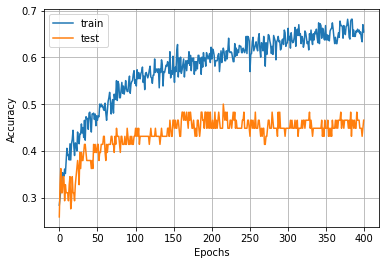

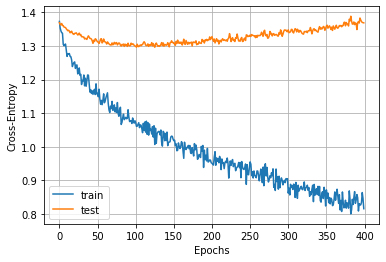


Iteration: 6

Epoch 00001: val_accuracy did not improve from 0.58621

Epoch 00002: val_accuracy did not improve from 0.58621

Epoch 00003: val_accuracy did not improve from 0.58621

Epoch 00004: val_accuracy did not improve from 0.58621

Epoch 00005: val_accuracy did not improve from 0.58621

Epoch 00006: val_accuracy improved from 0.58621 to 0.60345, saving model to /content/drive/My Drive/BCI-IV-2a/Modelos/Modelo_RWE09_CV.hdf5

Epoch 00007: val_accuracy did not improve from 0.60345

Epoch 00008: val_accuracy did not improve from 0.60345

Epoch 00009: val_accuracy did not improve from 0.60345

Epoch 00010: val_accuracy improved from 0.60345 to 0.63793, saving model to /content/drive/My Drive/BCI-IV-2a/Modelos/Modelo_RWE09_CV.hdf5

Epoch 00011: val_accuracy did not improve from 0.63793

Epoch 00012: val_accuracy did not improve from 0.63793

Epoch 00013: val_accuracy did not improve from 0.63793

Epoch 00014: val_accuracy did not improve from 0.63793

Epoch 00015: val_accuracy did not

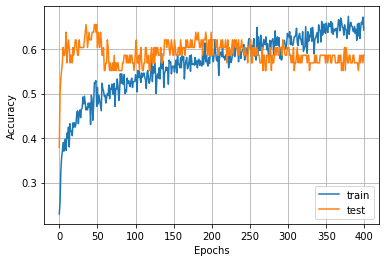

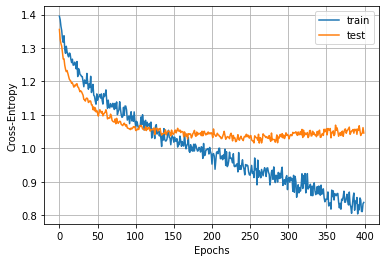


Iteration: 7

Epoch 00001: val_accuracy did not improve from 0.65517

Epoch 00002: val_accuracy did not improve from 0.65517

Epoch 00003: val_accuracy did not improve from 0.65517

Epoch 00004: val_accuracy did not improve from 0.65517

Epoch 00005: val_accuracy did not improve from 0.65517

Epoch 00006: val_accuracy did not improve from 0.65517

Epoch 00007: val_accuracy did not improve from 0.65517

Epoch 00008: val_accuracy did not improve from 0.65517

Epoch 00009: val_accuracy did not improve from 0.65517

Epoch 00010: val_accuracy did not improve from 0.65517

Epoch 00011: val_accuracy did not improve from 0.65517

Epoch 00012: val_accuracy did not improve from 0.65517

Epoch 00013: val_accuracy did not improve from 0.65517

Epoch 00014: val_accuracy did not improve from 0.65517

Epoch 00015: val_accuracy did not improve from 0.65517

Epoch 00016: val_accuracy did not improve from 0.65517

Epoch 00017: val_accuracy did not improve from 0.65517

Epoch 00018: val_accuracy did not

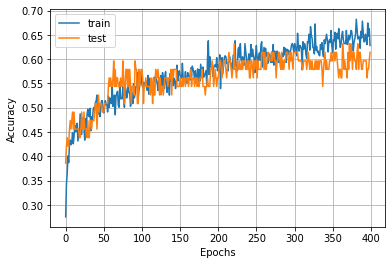

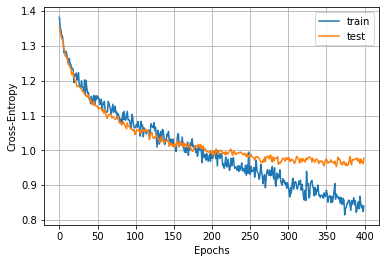


Iteration: 8

Epoch 00001: val_accuracy did not improve from 0.65517

Epoch 00002: val_accuracy did not improve from 0.65517

Epoch 00003: val_accuracy did not improve from 0.65517

Epoch 00004: val_accuracy did not improve from 0.65517

Epoch 00005: val_accuracy did not improve from 0.65517

Epoch 00006: val_accuracy did not improve from 0.65517

Epoch 00007: val_accuracy did not improve from 0.65517

Epoch 00008: val_accuracy did not improve from 0.65517

Epoch 00009: val_accuracy did not improve from 0.65517

Epoch 00010: val_accuracy did not improve from 0.65517

Epoch 00011: val_accuracy did not improve from 0.65517

Epoch 00012: val_accuracy did not improve from 0.65517

Epoch 00013: val_accuracy did not improve from 0.65517

Epoch 00014: val_accuracy did not improve from 0.65517

Epoch 00015: val_accuracy did not improve from 0.65517

Epoch 00016: val_accuracy did not improve from 0.65517

Epoch 00017: val_accuracy did not improve from 0.65517

Epoch 00018: val_accuracy did not

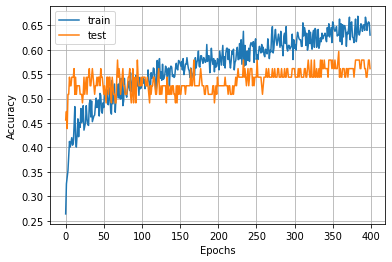

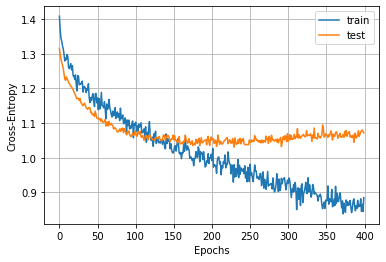


Iteration: 9

Epoch 00001: val_accuracy did not improve from 0.65517

Epoch 00002: val_accuracy did not improve from 0.65517

Epoch 00003: val_accuracy did not improve from 0.65517

Epoch 00004: val_accuracy did not improve from 0.65517

Epoch 00005: val_accuracy did not improve from 0.65517

Epoch 00006: val_accuracy did not improve from 0.65517

Epoch 00007: val_accuracy did not improve from 0.65517

Epoch 00008: val_accuracy did not improve from 0.65517

Epoch 00009: val_accuracy did not improve from 0.65517

Epoch 00010: val_accuracy did not improve from 0.65517

Epoch 00011: val_accuracy did not improve from 0.65517

Epoch 00012: val_accuracy did not improve from 0.65517

Epoch 00013: val_accuracy did not improve from 0.65517

Epoch 00014: val_accuracy did not improve from 0.65517

Epoch 00015: val_accuracy did not improve from 0.65517

Epoch 00016: val_accuracy did not improve from 0.65517

Epoch 00017: val_accuracy did not improve from 0.65517

Epoch 00018: val_accuracy did not

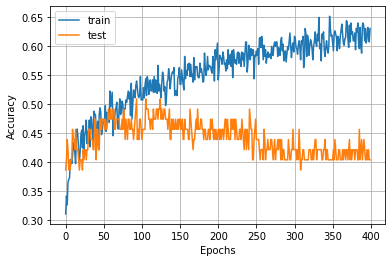

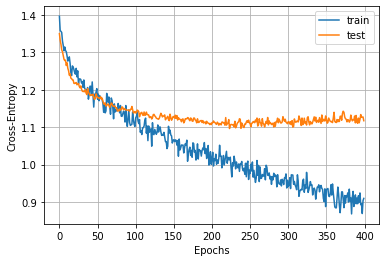


Iteration: 10

Epoch 00001: val_accuracy did not improve from 0.65517

Epoch 00002: val_accuracy did not improve from 0.65517

Epoch 00003: val_accuracy did not improve from 0.65517

Epoch 00004: val_accuracy did not improve from 0.65517

Epoch 00005: val_accuracy did not improve from 0.65517

Epoch 00006: val_accuracy did not improve from 0.65517

Epoch 00007: val_accuracy did not improve from 0.65517

Epoch 00008: val_accuracy did not improve from 0.65517

Epoch 00009: val_accuracy did not improve from 0.65517

Epoch 00010: val_accuracy did not improve from 0.65517

Epoch 00011: val_accuracy did not improve from 0.65517

Epoch 00012: val_accuracy did not improve from 0.65517

Epoch 00013: val_accuracy did not improve from 0.65517

Epoch 00014: val_accuracy did not improve from 0.65517

Epoch 00015: val_accuracy did not improve from 0.65517

Epoch 00016: val_accuracy did not improve from 0.65517

Epoch 00017: val_accuracy did not improve from 0.65517

Epoch 00018: val_accuracy did no

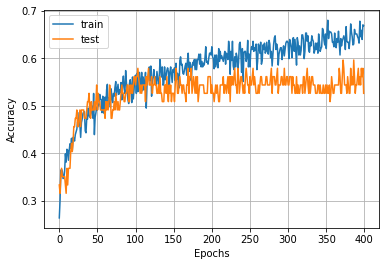

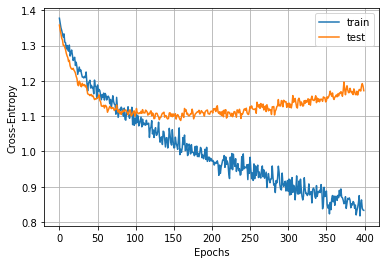


Resultados:
loss: [1.3863603781009544, 1.5155309233172187, 1.1569116321103325, 1.40911734515223, 1.3690407810540035, 1.0457165981161183, 0.9778744546990645, 1.071534890877573, 1.1172277174497907, 1.1720691250081647]
accuracy: [0.43103447556495667, 0.5, 0.5344827771186829, 0.4655172526836395, 0.4655172526836395, 0.5862069129943848, 0.6140350699424744, 0.5614035129547119, 0.4035087823867798, 0.5263158082962036]
kappa: [0.2395709177592371, 0.3338613861386138, 0.3783247320365224, 0.2859412231930102, 0.2876386687797148, 0.4473997618102422, 0.4850102669404517, 0.41550451189499593, 0.20443349753694584, 0.3687448728465955]
Tiempo: 388.4622631072998


In [16]:
inicio = time.time()
array_loss = []
array_acc = []
array_kappa = []
i = 0
for iTrain, jTest in skf.split(x, y):
  print("\nIteration:", i + 1)
  x_train, x_test = x[iTrain], x[jTest]
  y_train, y_test = y[iTrain], y[jTest]

  model = CNN_2D()
  
  history = model.fit(x_train, y_train, epochs=400, batch_size=18,
                      validation_data=(x_test, y_test), verbose=0,
                      callbacks=[mc])
  
  test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
  array_loss.append(test_loss)
  print("loss: ", test_loss)
  array_acc.append(test_acc)
  print("accuracy: ", test_acc)
    
  probabilidades = model.predict(x_test)
  y_pred = np.argmax(probabilidades, 1) #1=fila
    
  kappa = cohen_kappa_score(y_test, y_pred)
  array_kappa.append(kappa)
  print("kappa: ", kappa)
    
  matriz_confusion = confusion_matrix(y_test, y_pred)
  print("confusion matrix:\n", matriz_confusion)

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.grid()
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(['train', 'test'])
  plt.show()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.grid()
  plt.xlabel('Epochs')
  plt.ylabel('Cross-Entropy')
  plt.legend(['train', 'test'])
  plt.show()
  i += 1
print() 
print("Resultados:")
print("loss:", array_loss)
print("accuracy:", array_acc)
print("kappa:", array_kappa)
fin = time.time()
print("Tiempo:", fin - inicio)

In [17]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 22, 3, 32)         320       
_________________________________________________________________
flatten_10 (Flatten)         (None, 2112)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 16)                33808     
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_20 (Dense)             (None, 4)                 68        
Total params: 34,196
Trainable params: 34,196
Non-trainable params: 0
_________________________________________________________________


In [18]:
print("Mean Accuracy: %.4f" % np.mean(array_acc))
print("std: (+/- %.4f)" % np.std(array_acc))
print("Mean Kappa: %.4f" % np.mean(array_kappa))
print("std: (+/- %.4f)" % np.std(array_kappa))
print("Max Accuracy: %.4f" % np.max(array_acc))
print("Max Kappa: %.4f" % np.max(array_kappa))

Mean Accuracy: 0.5088
std: (+/- 0.0646)
Mean Kappa: 0.3446
std: (+/- 0.0863)
Max Accuracy: 0.6140
Max Kappa: 0.4850


In [0]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun May 17 23:51:28 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    31W / 250W |    615MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  